# pip install pandas matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import zipfile

zip_path = r"E:\New folder\archive.zip"  # your zip file path

with zipfile.ZipFile(zip_path, 'r') as z:
    print(z.namelist())



['WALMART_SALES_DATA.csv']


In [4]:
import zipfile
import pandas as pd

# path to your zip file
zip_path = r"E:\New folder\archive.zip"

# open and read the CSV inside the zip
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('WALMART_SALES_DATA.csv') as f:  # 👈 use the name you found
        df = pd.read_csv(f)

# check if it loaded correctly
print(df.head())
print(df.info())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [5]:
# Option 1: remove missing rows
df.dropna(inplace=True)

# Option 2: fill with mean (for numeric columns)
df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean(), inplace=True)


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df['Date'].dtypes)




datetime64[ns]


In [7]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [8]:
monthly_sales = df.groupby(['Year','Month'])['Weekly_Sales'].sum()


In [9]:
import pandas as pd

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year, Month, Week (ISO week)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype('Int64')  # safe for modern pandas

# Quick check
print(df[['Date','Year','Month','Week']].head())
print(df[['Date','Year','Month','Week']].dtypes)


        Date    Year  Month  Week
0 2010-05-02  2010.0    5.0    17
1 2010-12-02  2010.0   12.0    48
2        NaT     NaN    NaN  <NA>
3        NaT     NaN    NaN  <NA>
4 2010-05-03  2010.0    5.0    18
Date     datetime64[ns]
Year            float64
Month           float64
Week              Int64
dtype: object


In [10]:
total_sales = df['Weekly_Sales'].sum()
print("Total Walmart Sales (All Stores):", round(total_sales, 2))


Total Walmart Sales (All Stores): 6737218987.11


Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


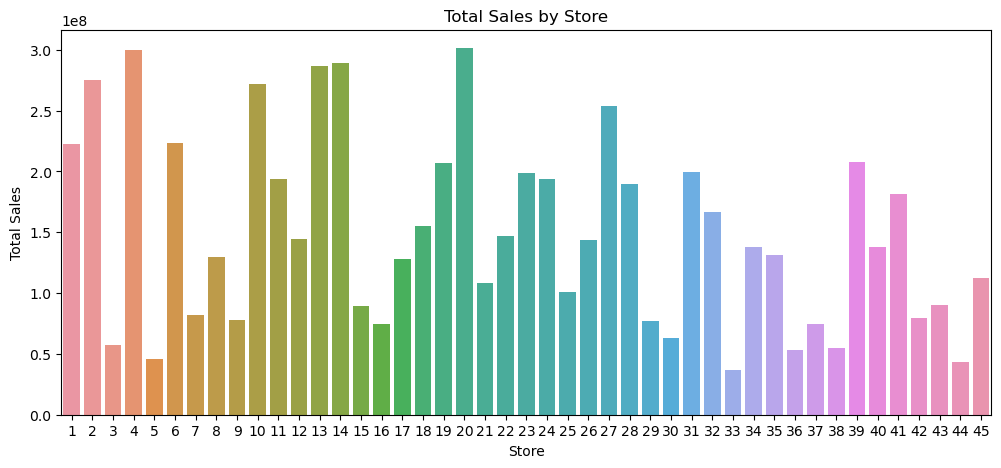

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total sales per store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(store_sales.head())  # Top 5 stores

# Plot
plt.figure(figsize=(12,5))
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


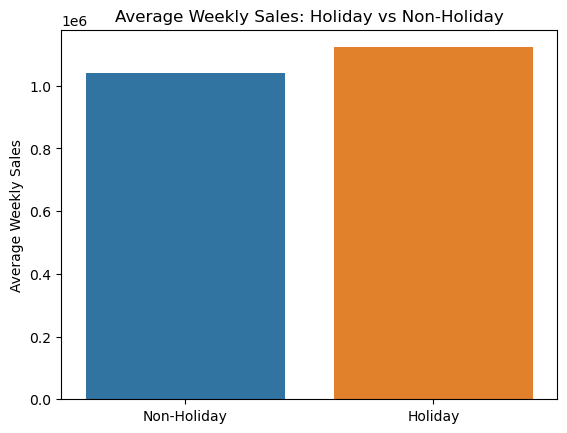

In [12]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print(holiday_sales)

sns.barplot(x=['Non-Holiday', 'Holiday'], y=holiday_sales.values)
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Weekly Sales")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


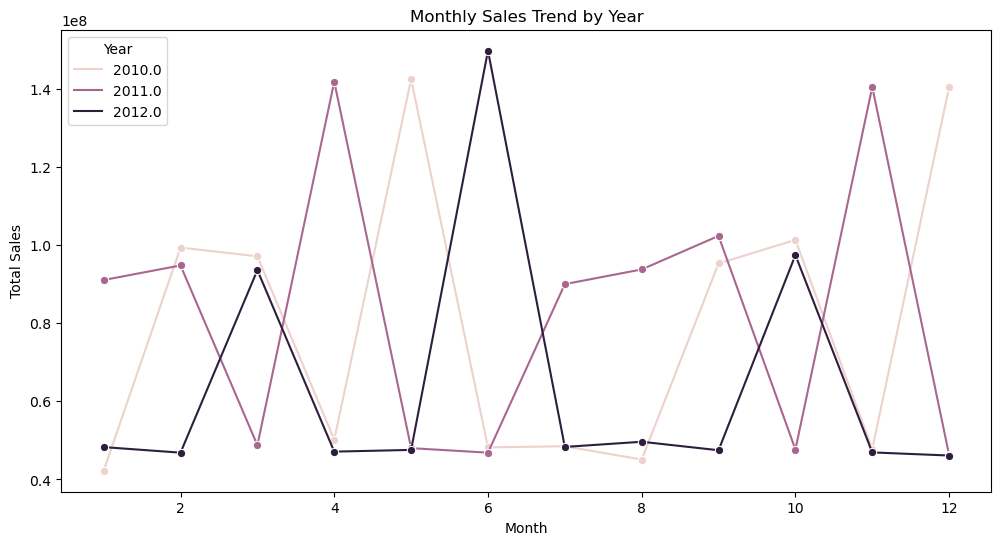

In [13]:
# Aggregate monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Plot monthly trend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


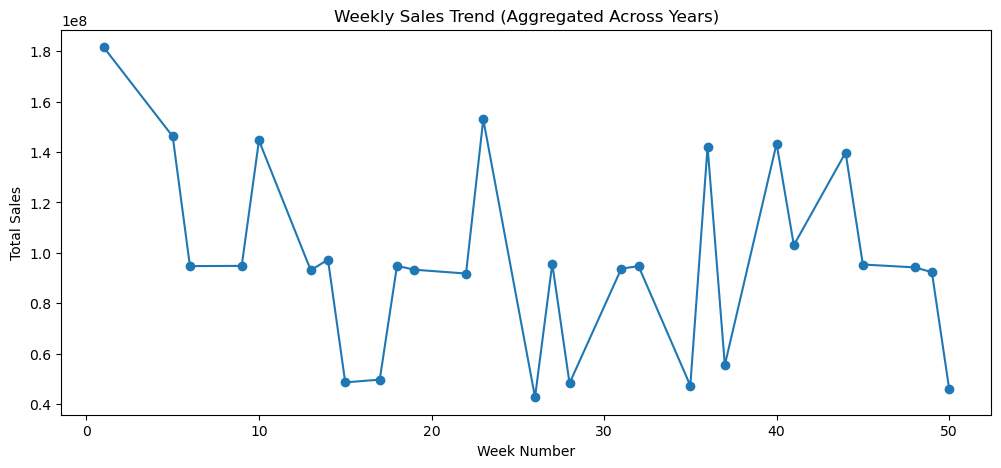

In [14]:
weekly_sales = df.groupby('Week')['Weekly_Sales'].sum()

plt.figure(figsize=(12,5))
weekly_sales.plot(kind='line', marker='o')
plt.title("Weekly Sales Trend (Aggregated Across Years)")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.show()


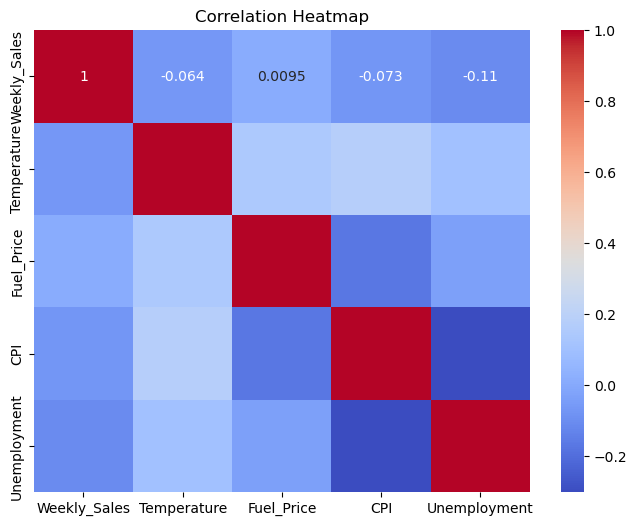

In [15]:
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


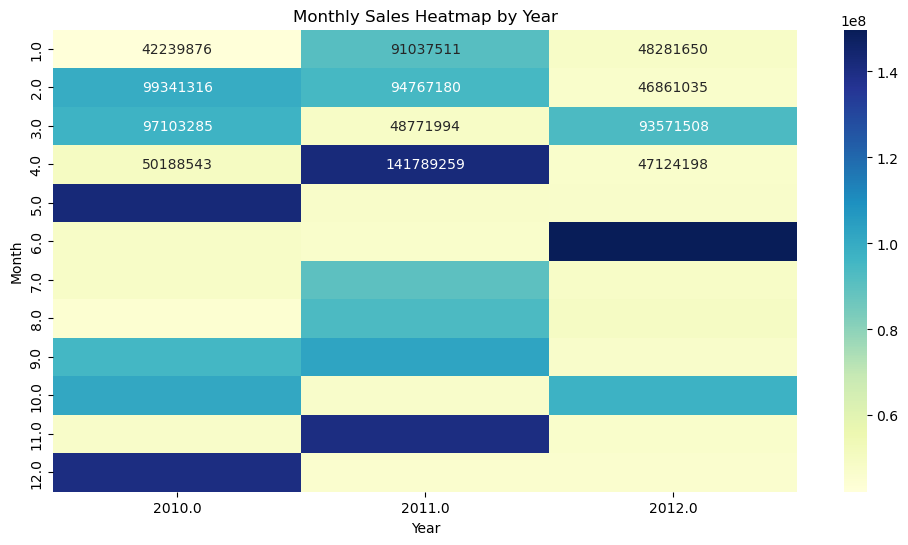

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data: rows = Month, columns = Year, values = total Weekly_Sales
monthly_pivot = df.groupby(['Month','Year'])['Weekly_Sales'].sum().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(monthly_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Sales Heatmap by Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()


In [17]:
# Summary statistics
print(df.describe())

# Correlation analysis
corr = df.corr(numeric_only=True)
print(corr)


             Store                           Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                           2565  6.435000e+03   6435.000000   
mean     23.000000  2011-05-29 11:47:22.105263104  1.046965e+06      0.069930   
min       1.000000            2010-01-10 00:00:00  2.099862e+05      0.000000   
25%      12.000000            2010-10-09 00:00:00  5.533501e+05      0.000000   
50%      23.000000            2011-05-08 00:00:00  9.607460e+05      0.000000   
75%      34.000000            2012-02-03 00:00:00  1.420159e+06      0.000000   
max      45.000000            2012-12-10 00:00:00  3.818686e+06      1.000000   
std      12.988182                            NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment        Month  \
count  6435.000000  6435.000000  6435.000000   6435.000000  2565.000000   
mean     60.663782     3.358607   171.578394      7.999151     6.561404   
min      -2.060000     2.472000   126.064000 

In [18]:
import pandas as pd

# Load data
# path to your zip file
zip_path = r"E:\New folder\archive.zip"

# open and read the CSV inside the zip
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('WALMART_SALES_DATA.csv') as f:  # use the name you found
        df = pd.read_csv(f)
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract useful time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# ------------------- KPI CALCULATIONS -------------------

# 1️⃣ Total Revenue (Overall sales)
total_revenue = df['Weekly_Sales'].sum()

# 2️⃣ Average Weekly Sales per Store
avg_weekly_sales_store = df.groupby('Store')['Weekly_Sales'].mean().mean()

# 3️⃣ Total Number of Stores
total_stores = df['Store'].nunique()

# 4️⃣ Highest Sales Week (Max Sales Record)
max_sales_row = df.loc[df['Weekly_Sales'].idxmax()]
max_sales_value = max_sales_row['Weekly_Sales']
max_sales_date = max_sales_row['Date']
max_sales_store = max_sales_row['Store']

# 5️⃣ Holiday vs Non-Holiday Sales Difference (%)
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_increase_pct = ((holiday_sales[1] - holiday_sales[0]) / holiday_sales[0]) * 100

# 6️⃣ Average Unemployment & CPI impact overview
avg_unemployment = df['Unemployment'].mean()
avg_cpi = df['CPI'].mean()

# ------------------- KPI OUTPUT SUMMARY -------------------

print("Walmart Sales KPI Summary")
print("----------------------------------")
print(f"🏬 Total Revenue: ${total_revenue:,.2f}")
print(f"📈 Avg Weekly Sales per Store: ${avg_weekly_sales_store:,.2f}")
print(f"🏢 Total Number of Stores: {total_stores}")
print(f"🔥 Highest Weekly Sale: ${max_sales_value:,.2f} (Store {max_sales_store} on {max_sales_date.date()})")
print(f"🎉 Holiday Sales are higher by: {holiday_increase_pct:.2f}% compared to non-holiday weeks")
print(f"💼 Avg CPI: {avg_cpi:.2f}")
print(f"💡 Avg Unemployment Rate: {avg_unemployment:.2f}%")


Walmart Sales KPI Summary
----------------------------------
🏬 Total Revenue: $6,737,218,987.11
📈 Avg Weekly Sales per Store: $1,046,964.88
🏢 Total Number of Stores: 45
🔥 Highest Weekly Sale: $3,818,686.45 (Store 14 on NaT)
🎉 Holiday Sales are higher by: 7.84% compared to non-holiday weeks
💼 Avg CPI: 171.58
💡 Avg Unemployment Rate: 8.00%


C:\Users\Admin\AppData\Local\Temp\ipykernel_12940\3604656071.py:16: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12940\3604656071.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12940\3604656071.py:16: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12940\3604656071.py:16: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12940\3604656071.py:16: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12940\3604656071.py:16: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Loc

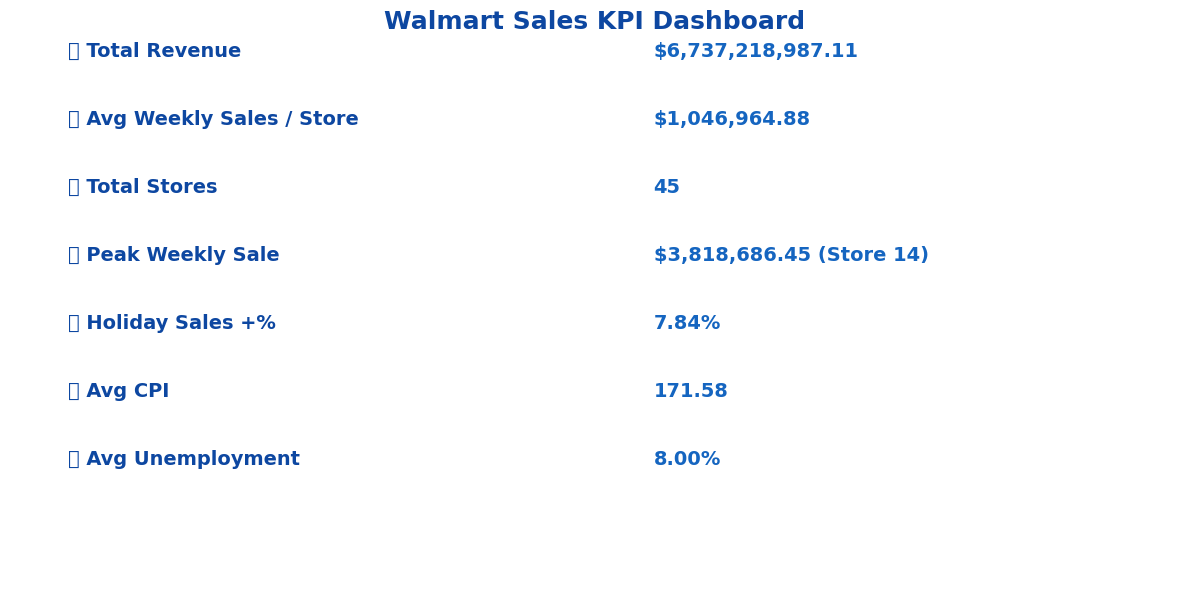

In [20]:
# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')  # Hide axes

# Colors for each card
colors = ["#e3f2fd", "#bbdefb", "#90caf9", "#64b5f6", "#42a5f5", "#2196f3", "#1e88e5"]

# Plot each KPI as text on the figure
for i, (label, value) in enumerate(kpis.items()):
    ax.text(0.05, 1 - (i * 0.13), label, fontsize=14, fontweight='bold', color='#0d47a1', transform=ax.transAxes)
    ax.text(0.55, 1 - (i * 0.13), str(value), fontsize=14, fontweight='bold', color='#1565c0', transform=ax.transAxes)

# Add a title
plt.title("Walmart Sales KPI Dashboard", fontsize=18, fontweight='bold', color='#0d47a1', pad=20)

plt.tight_layout()
plt.show()


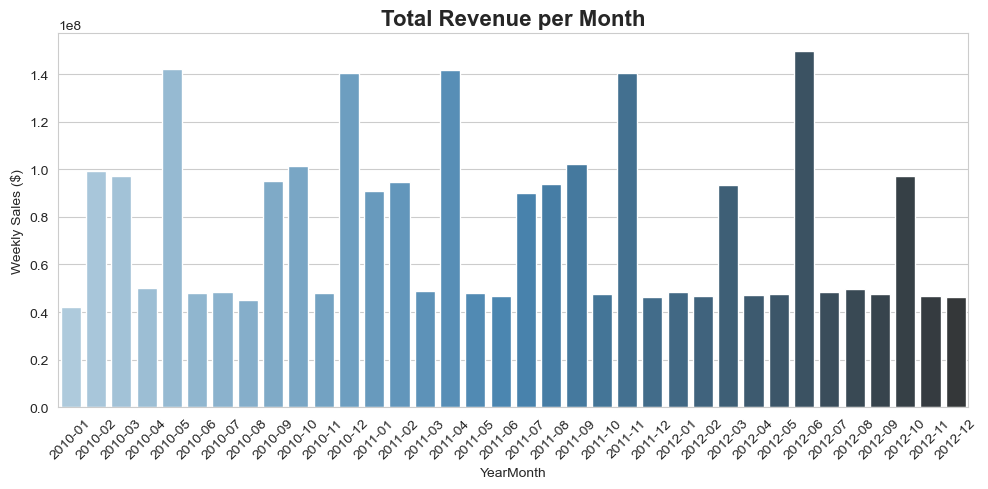

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


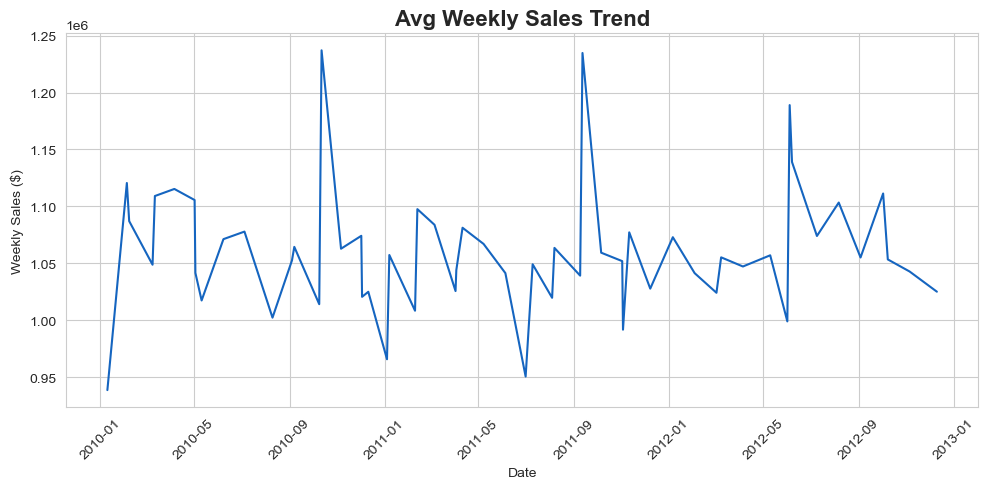

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


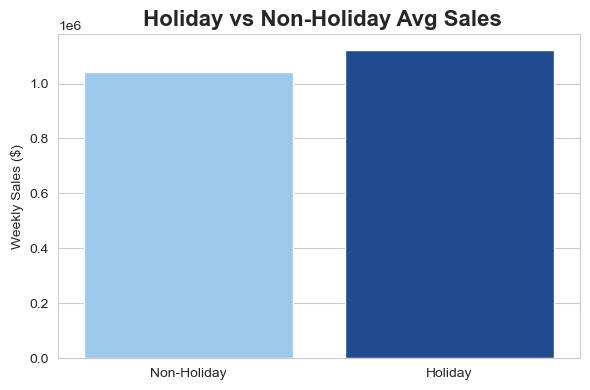

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")  # professional style

# ------------------- PREPARE DATA -------------------
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

# ------------------- CALCULATE KPIs -------------------
total_revenue = df['Weekly_Sales'].sum()
avg_weekly_sales = df['Weekly_Sales'].mean()

holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_increase_pct = ((holiday_sales[1] - holiday_sales[0]) / holiday_sales[0]) * 100

avg_cpi = df['CPI'].mean()
avg_unemployment = df['Unemployment'].mean()

# ------------------- CHART 1: Total Revenue per Month -------------------
plt.figure(figsize=(10,5))
monthly_sales = df.groupby('YearMonth')['Weekly_Sales'].sum()
sns.barplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, palette="Blues_d")
plt.title("Total Revenue per Month", fontsize=16, fontweight='bold')
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------- CHART 2: Avg Weekly Sales Trend -------------------
plt.figure(figsize=(10,5))
weekly_avg = df.groupby('Date')['Weekly_Sales'].mean()
sns.lineplot(x=weekly_avg.index, y=weekly_avg.values, color="#1565c0")
plt.title("Avg Weekly Sales Trend", fontsize=16, fontweight='bold')
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------- CHART 3: Holiday vs Non-Holiday Avg Sales -------------------
plt.figure(figsize=(6,4))
sns.barplot(x=['Non-Holiday','Holiday'], y=holiday_sales.values, palette=["#90caf9","#0d47a1"])
plt.title(" Holiday vs Non-Holiday Avg Sales", fontsize=16, fontweight='bold')
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.show()





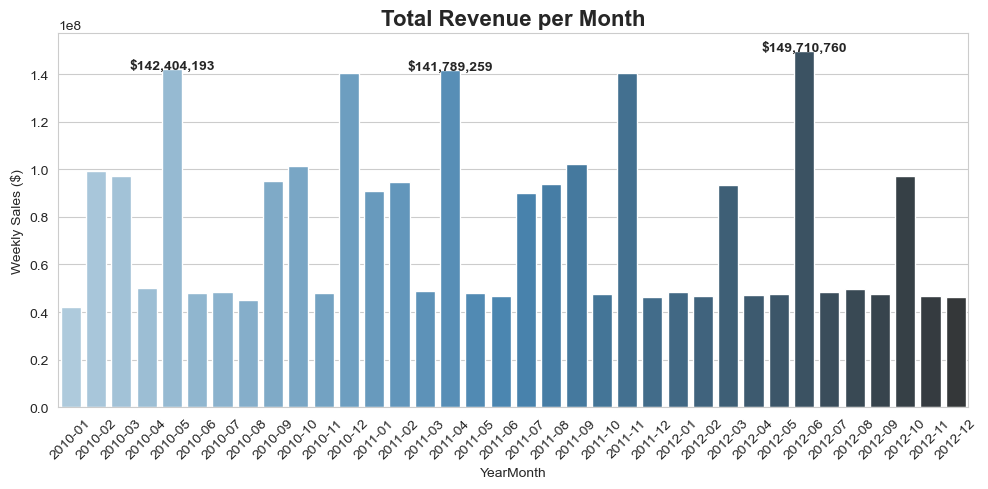

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

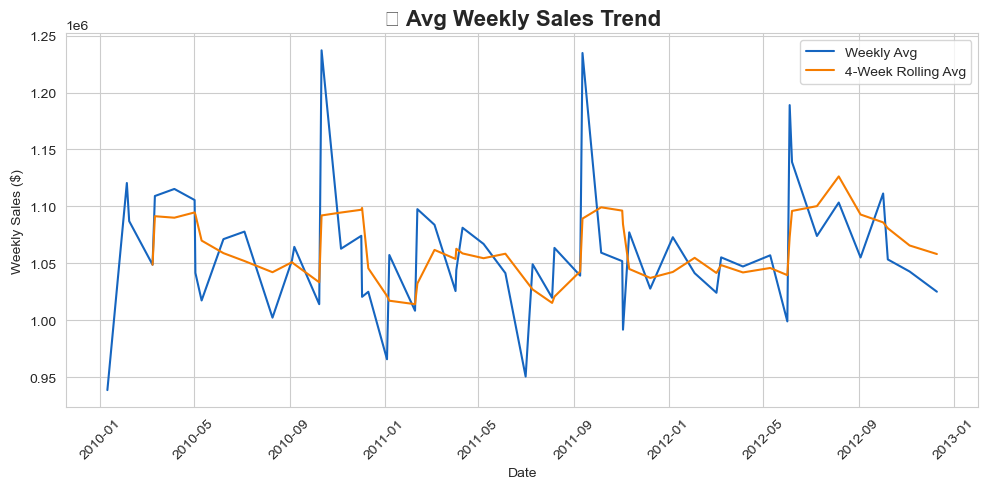

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12940\4048530064.py:64: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


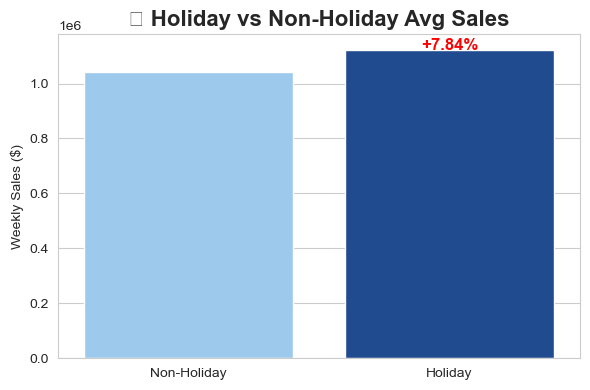

C:\Users\Admin\AppData\Local\Temp\ipykernel_12940\4048530064.py:79: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12940\4048530064.py:79: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


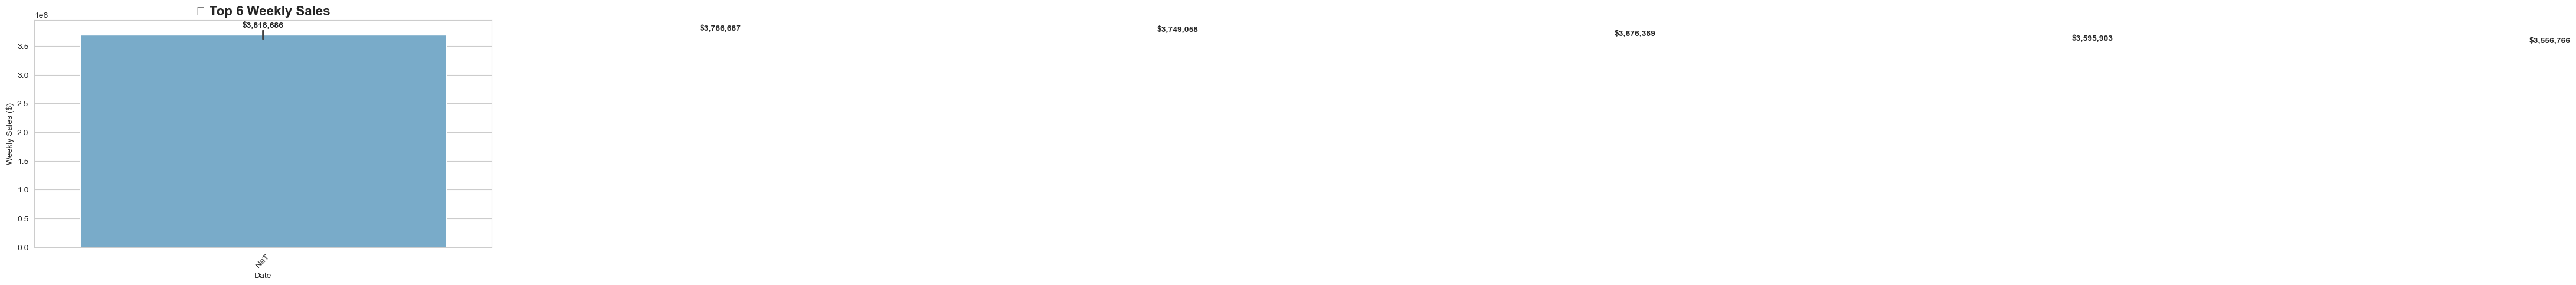

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

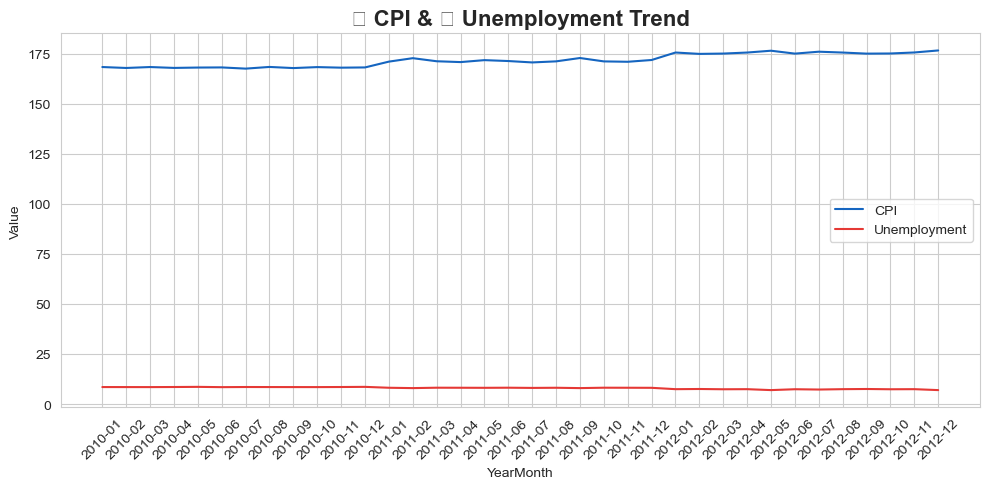

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")  # professional style

# ------------------- PREPARE DATA -------------------
# Assume df is already loaded
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

# ------------------- CALCULATE KPIs -------------------
total_revenue = df['Weekly_Sales'].sum()
avg_weekly_sales = df['Weekly_Sales'].mean()

holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_increase_pct = ((holiday_sales[1] - holiday_sales[0]) / holiday_sales[0]) * 100

avg_cpi = df['CPI'].mean()
avg_unemployment = df['Unemployment'].mean()

# ------------------- CHART 1: Total Revenue per Month -------------------
plt.figure(figsize=(10,5))
monthly_sales = df.groupby('YearMonth')['Weekly_Sales'].sum()
sns.barplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, palette="Blues_d")

# Annotate top 3 months
top3_idx = monthly_sales.values.argsort()[-3:]
for i in top3_idx:
    val = monthly_sales.values[i]
    plt.text(i, val + 5000, f"${val:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.title("Total Revenue per Month", fontsize=16, fontweight='bold')
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------- CHART 2: Avg Weekly Sales Trend -------------------
plt.figure(figsize=(10,5))
weekly_avg = df.groupby('Date')['Weekly_Sales'].mean()
sns.lineplot(x=weekly_avg.index, y=weekly_avg.values, color="#1565c0", label="Weekly Avg")

# 4-week rolling average
rolling_avg = weekly_avg.rolling(4).mean()
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, color="#f57c00", label="4-Week Rolling Avg")

plt.title("📈 Avg Weekly Sales Trend", fontsize=16, fontweight='bold')
plt.ylabel("Weekly Sales ($)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------- CHART 3: Holiday vs Non-Holiday Avg Sales -------------------
plt.figure(figsize=(6,4))
sns.barplot(x=['Non-Holiday','Holiday'], y=holiday_sales.values, palette=["#90caf9","#0d47a1"])

# Annotate holiday increase %
plt.text(1, holiday_sales[1]+500, f"+{holiday_increase_pct:.2f}%", ha='center', fontsize=12, fontweight='bold', color='red')

plt.title("🎉 Holiday vs Non-Holiday Avg Sales", fontsize=16, fontweight='bold')
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.show()

# ------------------- CHART 4: Top 6 Weekly Sales -------------------
plt.figure(figsize=(10,5))
top_weeks = df.nlargest(6, 'Weekly_Sales')
sns.barplot(x=top_weeks['Date'].astype(str), y=top_weeks['Weekly_Sales'], palette="Blues_r")

# Annotate exact sales
for i, val in enumerate(top_weeks['Weekly_Sales'].values):
    plt.text(i, val + 5000, f"${val:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.title("🔥 Top 6 Weekly Sales", fontsize=16, fontweight='bold')
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------- CHART 5: CPI & Unemployment Trend -------------------
plt.figure(figsize=(10,5))
monthly_cpi = df.groupby('YearMonth')['CPI'].mean()
monthly_unemployment = df.groupby('YearMonth')['Unemployment'].mean()
sns.lineplot(x=monthly_cpi.index.astype(str), y=monthly_cpi.values, label="CPI", color="#1565c0")
sns.lineplot(x=monthly_unemployment.index.astype(str), y=monthly_unemployment.values, label="Unemployment", color="#e53935")

plt.title("💼 CPI & 💡 Unemployment Trend", fontsize=16, fontweight='bold')
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import zipfile
import plotly.express as px
import streamlit as st

# ------------------ LOAD DATA FROM ZIP ------------------
zip_path = r"E:\New folder\archive.zip"  # your actual zip file path

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('WALMART_SALES_DATA.csv') as f:  #exact CSV name inside zip
        df = pd.read_csv(f)

# ------------------ CLEAN & PREPARE DATA ------------------
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# ------------------ STREAMLIT APP UI ------------------
st.set_page_config(page_title="Walmart Sales Dashboard", layout="wide")
st.title("🏪 Walmart Retail Sales Dashboard")

# Sidebar filters
st.sidebar.header("🔍 Filter Options")
selected_year = st.sidebar.multiselect("Select Year:", options=sorted(df['Year'].unique()), default=sorted(df['Year'].unique()))
selected_store = st.sidebar.multiselect("Select Store:", options=sorted(df['Store'].unique()), default=sorted(df['Store'].unique()))
holiday_filter = st.sidebar.radio("Holiday Weeks:", options=["All", "Holiday", "Non-Holiday"])

# Apply filters
filtered_df = df[df['Year'].isin(selected_year) & df['Store'].isin(selected_store)]
if holiday_filter == "Holiday":
    filtered_df = filtered_df[filtered_df['Holiday_Flag'] == 1]
elif holiday_filter == "Non-Holiday":
    filtered_df = filtered_df[filtered_df['Holiday_Flag'] == 0]

# ------------------ KPI METRICS ------------------
total_revenue = filtered_df['Weekly_Sales'].sum()
avg_weekly_sales = filtered_df['Weekly_Sales'].mean()
top_store = filtered_df.groupby('Store')['Weekly_Sales'].sum().idxmax()
holiday_sales = filtered_df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_increase_pct = ((holiday_sales[1] - holiday_sales[0]) / holiday_sales[0]) * 100 if 0 in holiday_sales and 1 in holiday_sales else 0

# KPI Cards
col1, col2, col3 = st.columns(3)
col1.metric("Total Revenue", f"${total_revenue:,.0f}")
col2.metric("Avg Weekly Sales", f"${avg_weekly_sales:,.0f}")
col3.metric("Top Store", f"Store {top_store}")

# ------------------ CHART 1: Weekly Sales Trend ------------------
st.subheader("📅 Weekly Sales Trend")
fig1 = px.line(filtered_df, x='Date', y='Weekly_Sales', color='Store',
               title="Weekly Sales by Store", markers=True,
               labels={'Weekly_Sales':'Weekly Sales ($)'})
st.plotly_chart(fig1, use_container_width=True)

# ------------------ CHART 2: Average Monthly Sales ------------------
st.subheader("🗓️ Average Monthly Sales")
monthly_avg = filtered_df.groupby(['Year','Month'], sort=False)['Weekly_Sales'].mean().reset_index()
fig2 = px.bar(monthly_avg, x='Month', y='Weekly_Sales', color='Year',
              barmode='group', text_auto=True,
              title="Average Monthly Sales by Year")
st.plotly_chart(fig2, use_container_width=True)

# ------------------ CHART 3: Holiday vs Non-Holiday ------------------
st.subheader("Holiday vs Non-Holiday Sales")
holiday_sales_df = filtered_df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
holiday_sales_df['Holiday'] = holiday_sales_df['Holiday_Flag'].map({0:'Non-Holiday', 1:'Holiday'})
fig3 = px.bar(holiday_sales_df, x='Holiday', y='Weekly_Sales', color='Holiday',
              text_auto=True, title="Average Weekly Sales: Holiday vs Non-Holiday")
st.plotly_chart(fig3, use_container_width=True)

# ------------------ CHART 4: CPI & Unemployment Trends ------------------
st.subheader("CPI and Unemployment Trends")
cpi_unemp = filtered_df.groupby('Date')[['CPI','Unemployment']].mean().reset_index()
fig4 = px.line(cpi_unemp, x='Date', y=['CPI','Unemployment'],
               title="CPI vs Unemployment Over Time")
st.plotly_chart(fig4, use_container_width=True)

# ------------------ FOOTER ------------------
st.caption("Developed by [Your Name] — Retail Sales Analysis using Python, Plotly & Streamlit")

